## <center> Sophia Tang Hart </center>
### <center> sophia.t.hart@gmail.com </center>
## <center> Breast Cancer Classification </center>
### <center> March 30, 2021 </center>

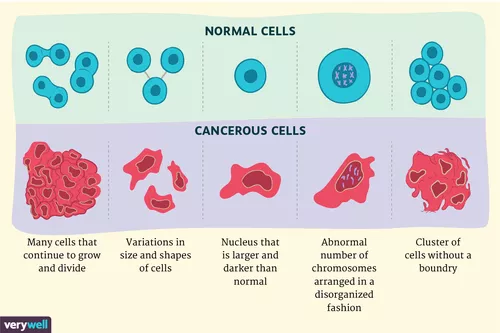
 
 

# ABSTRACT

Breast cancer is the second leading cause of death and first leading cancer in women.  The initial phase of breast cancer detection methods are ultrasound and mammogram.  A biopsy sample is necessary to definitively tell whether a patient has breast cancer.  Pathologists look under the microscope and analyze physical characteristics of the cells.  Normal cells are round and have similar size.  Cancer cells have higher copies of DNA, therefore the cell nucleus is larger.  Cancer cells also have irregular shape or higher architecture.  The larger size and higher architecture are characteristics we can use to determine whether a tumor is benign or malignant.  

The data of my study is taken from Kaggle Breast Cancer (Diagnostic) Dataset.  I wanted to know, can we classify benign and malignant cells of a new patient?  This is my first Kaggle Jupyter Notebook submission -- so I am open to comments -- I am new to Data Science and Python.  I looked into six algorithms: Logistic Regression, Naive Bayes’, k-Nearest Neighbors, Random Forest, Support Vector Machine, and Super Learner.  With a combination of balancing data and resampling, replacing outliers with group means, test harness and cross validation bootstrapping, and this nice dataset, Random Forest gave an accuracy of 99.44%.  SVM and Super Learner give similar results.  Such extraordinary accuracy suggests that we can apply data science along with doctors’ expertise to study cells from many patients.  In the future, it would be exciting to apply data science and proactively monitor a vast number of women’s breast health so that we can have early intervention should it be helpful. 


# STEP 1: Formulate the Project Research Framework

## a) Brest Cancer Dataset
The data of this project is taken from Kaggle Breast Cancer Wisconsin (Diagnostic) Data Set https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. The goal is to Predict whether the cancer is benign or malignant. Another goal is to increase prediction accuracy. The same data is also found in UC Irvine Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Data was donated in 1995.

There are 569 patients. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. There are 32 attributes and no missing value. Below is a description of the attributes. There are three sets of (a)-(j). For example, attribute 3 is radius_mean, attribute 13 is radius_se (standard error), and attribute 23 is radius_worst.

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:


a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)




### Research Questions¶

1. Can we separate two kinds of tumor, malignant and benign?
2. What are the most important features of the cell in determining a cancerous tumor?
3. How accurate is the prediction?

## b) Scientific Method
The research questions are: Can we classify benign and malignant cells of a new patient? Can data science be applied as a tool for doctors to make breast cancer diagnosis? Can data science give insights in conjunction with doctors expertise to study characteristics of cancer cells? We will train our data science models using the data above. They are nucleus features of cells from breast mass and their diagnosis. 

We hypothesize that H1: the nucleus of a malignant cell is larger and has more architecture than that of a benign cell. The null hypothesis H0 would be malignant and benign cells are the same.

We predict that our machine learning algorithms can predict if a new patient is likely to have cancer.

The hypothesis will be tested by a statistical analysis t-test. We first assume the null hypothesis is true: malignant and benign cells are the same. We build a partial sampling distribution of the null hypothesis. If the p-value is less than the alpha/2, we reject H0 and H1 is statistically true. 

If H1 is true, malignant cells are larger and have more architecture than benign cells, the next steps would be: 1. to predict pre-cancer cells, 2. to use our machine learning models in more clinical data, and compare our prediction with doctor's diagnosis and validate our models.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as stat
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from scipy.stats import ttest_ind, ttest_ind_from_stats
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

%matplotlib inline


# STEP 2: Data Science Analysis

## 2.1 Descriptive Statistics
"Diagnosis" is the only categorical variable (B for benign, M for malignant) in this dataset. It's a categorical variable because it's a label. 

All other features are quantitatibe variables. They are quantitative variables because they are measurements.

In [71]:
# Load data and make it a dataframe
breastcancerData = pd.read_csv("breastCancer_data.csv")
breastcancerData = pd.DataFrame(breastcancerData)

### 2.1.1 Numerical Summaries

#### a) Categorical Variable

In [72]:
# print summary of categorical variable
distriubtion = breastcancerData['diagnosis'].value_counts()
print(distriubtion)

# calculate and print proportions
B_prop = 357/(357+212)
M_prop = 212/(357+212)
print('Proportion of B is %.2g' % B_prop)
print('Proportion of M is %.2g' % M_prop)

# contingency table
print("There's only one categorical variable in this dataset. No contingency table can be generated")

B    357
M    212
Name: diagnosis, dtype: int64
Proportion of B is 0.63
Proportion of M is 0.37
There's only one categorical variable in this dataset. No contingency table can be generated


#### b) Quantitative Variables

In [73]:
# numerical summary of quantitative variables
# ungroup
print(breastcancerData['concave points_worst'].describe())

# grouped by categorical variable
groupData = breastcancerData.groupby('diagnosis')

# variable 
print(groupData['concave points_worst'].describe())


count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave points_worst, dtype: float64
           count      mean       std      min      25%      50%       75%  \
diagnosis                                                                   
B          357.0  0.074444  0.035797  0.00000  0.05104  0.07431  0.097490   
M          212.0  0.182237  0.046308  0.02899  0.15275  0.18200  0.210675   

             max  
diagnosis         
B          0.175  
M          0.291  


#### c) Main Findings
For quantitative variable "concave points_worst", In terms of center, M group has higher mean (0.1822) and median (0.182) than B group. In terms of spread, M also has a wider standard deviation (0.0463), interquartile range (IQR is 0.0465 for B and 0.058 for M), and min-max range (0.291-0.029). The data is pretty symmetrical for both groups, because median (50%) is almost the same as the mean for both groups. 

This shows cells from malignant tumor have more concave points (greater mean and median), indicating a more complex architecture.

### 2.1.2 Graphical Summaries

#### a) Bar diagram of categorical variable

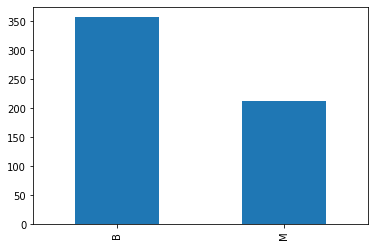

In [74]:
# bar diagram
distriubtion.plot(kind='bar')

#### b) Histogram and boxplot for quantitative variable

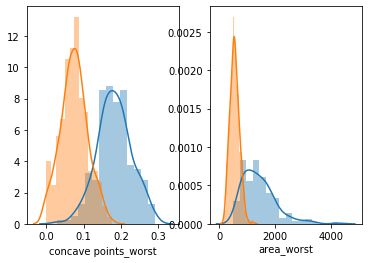

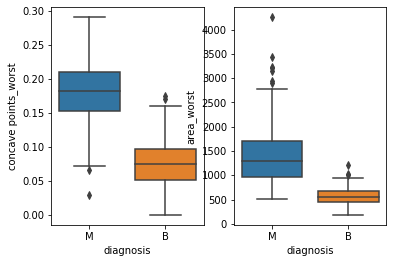

In [75]:
# Histogram
Mdata = breastcancerData[breastcancerData['diagnosis'] == 'M']
Bdata = breastcancerData[breastcancerData['diagnosis'] == 'B']

fig, axs = plt.subplots(1,2)
# variable 1
sns.distplot(Mdata['concave points_worst'], ax=axs[0])
sns.distplot(Bdata['concave points_worst'], ax=axs[0])
# variable 2
sns.distplot(Mdata['area_worst'], ax=axs[1])
sns.distplot(Bdata['area_worst'], ax=axs[1])

#Boxplot
fig, axs = plt.subplots(1,2)
sns.boxplot(x="diagnosis", y='concave points_worst', data=breastcancerData, ax=axs[0])
sns.boxplot(x="diagnosis", y='area_worst', data=breastcancerData, ax=axs[1])

#### c) Main Findings
For the "concave points_worst" variable, M group has a higher mean and median than B group (shown in histogram and boxplot). M group has a wider spread in terms of standard deviation, IQR, and min-max range. Both M and B groups look symmetrical (histogram). B group has lowest minimun value and M group has the highest maximun value. 

For the "area_worst" variable, M group has a higher mean and median than B group (shown in histogram and boxplot). M group has a wider spread in terms of standard deviation, IQR, and min-max range. The B group is pretty symmetrical. The M group is right-skewed. B group has lowest minimun value and M group has the highest maximun value. 

Both area (size) and concave points (achitecture) show that malignant cells have larger and more complex nuclei from this dataset. This agrees with what commonly known about cancer cells. 

## 2.2 Correlation

#### a) Correlation coefficient
We will take two variables: "concave point_worst" and "radius_worst"

In [76]:
# coefficient coefficient

# take out the variables 
corrData = breastcancerData[['concave points_worst', 'radius_worst']]

# Pearson correlation
corr_matrix = corrData.corr(method='pearson')
corr_matrix

,concave points_worst,radius_worst
concave points_worst,1.000000,0.787424
radius_worst,0.787424,1.000000


#### b) Scatter plot and r^2

r square is 0.62


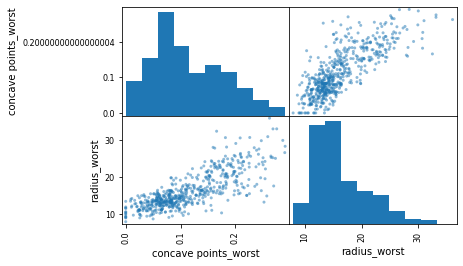

In [77]:
# scatter plot and r^2

#scatter plot
scatter_matrix(corrData)

# r^2
var1 = corrData['concave points_worst']
var2 = corrData['radius_worst']
correlation_matrix = np.corrcoef(var1, var2)
correlation_xy = correlation_matrix[0,1] # the number off diagonal
r_squared = correlation_xy**2
print("r square is %.2f" % r_squared)

r^2=0.62. This means 62% of the variation seen in concave_points_worst is explained by radius_worst. 38% of the variation is explained by other factors.  

#### c) Correlation Heatmap 

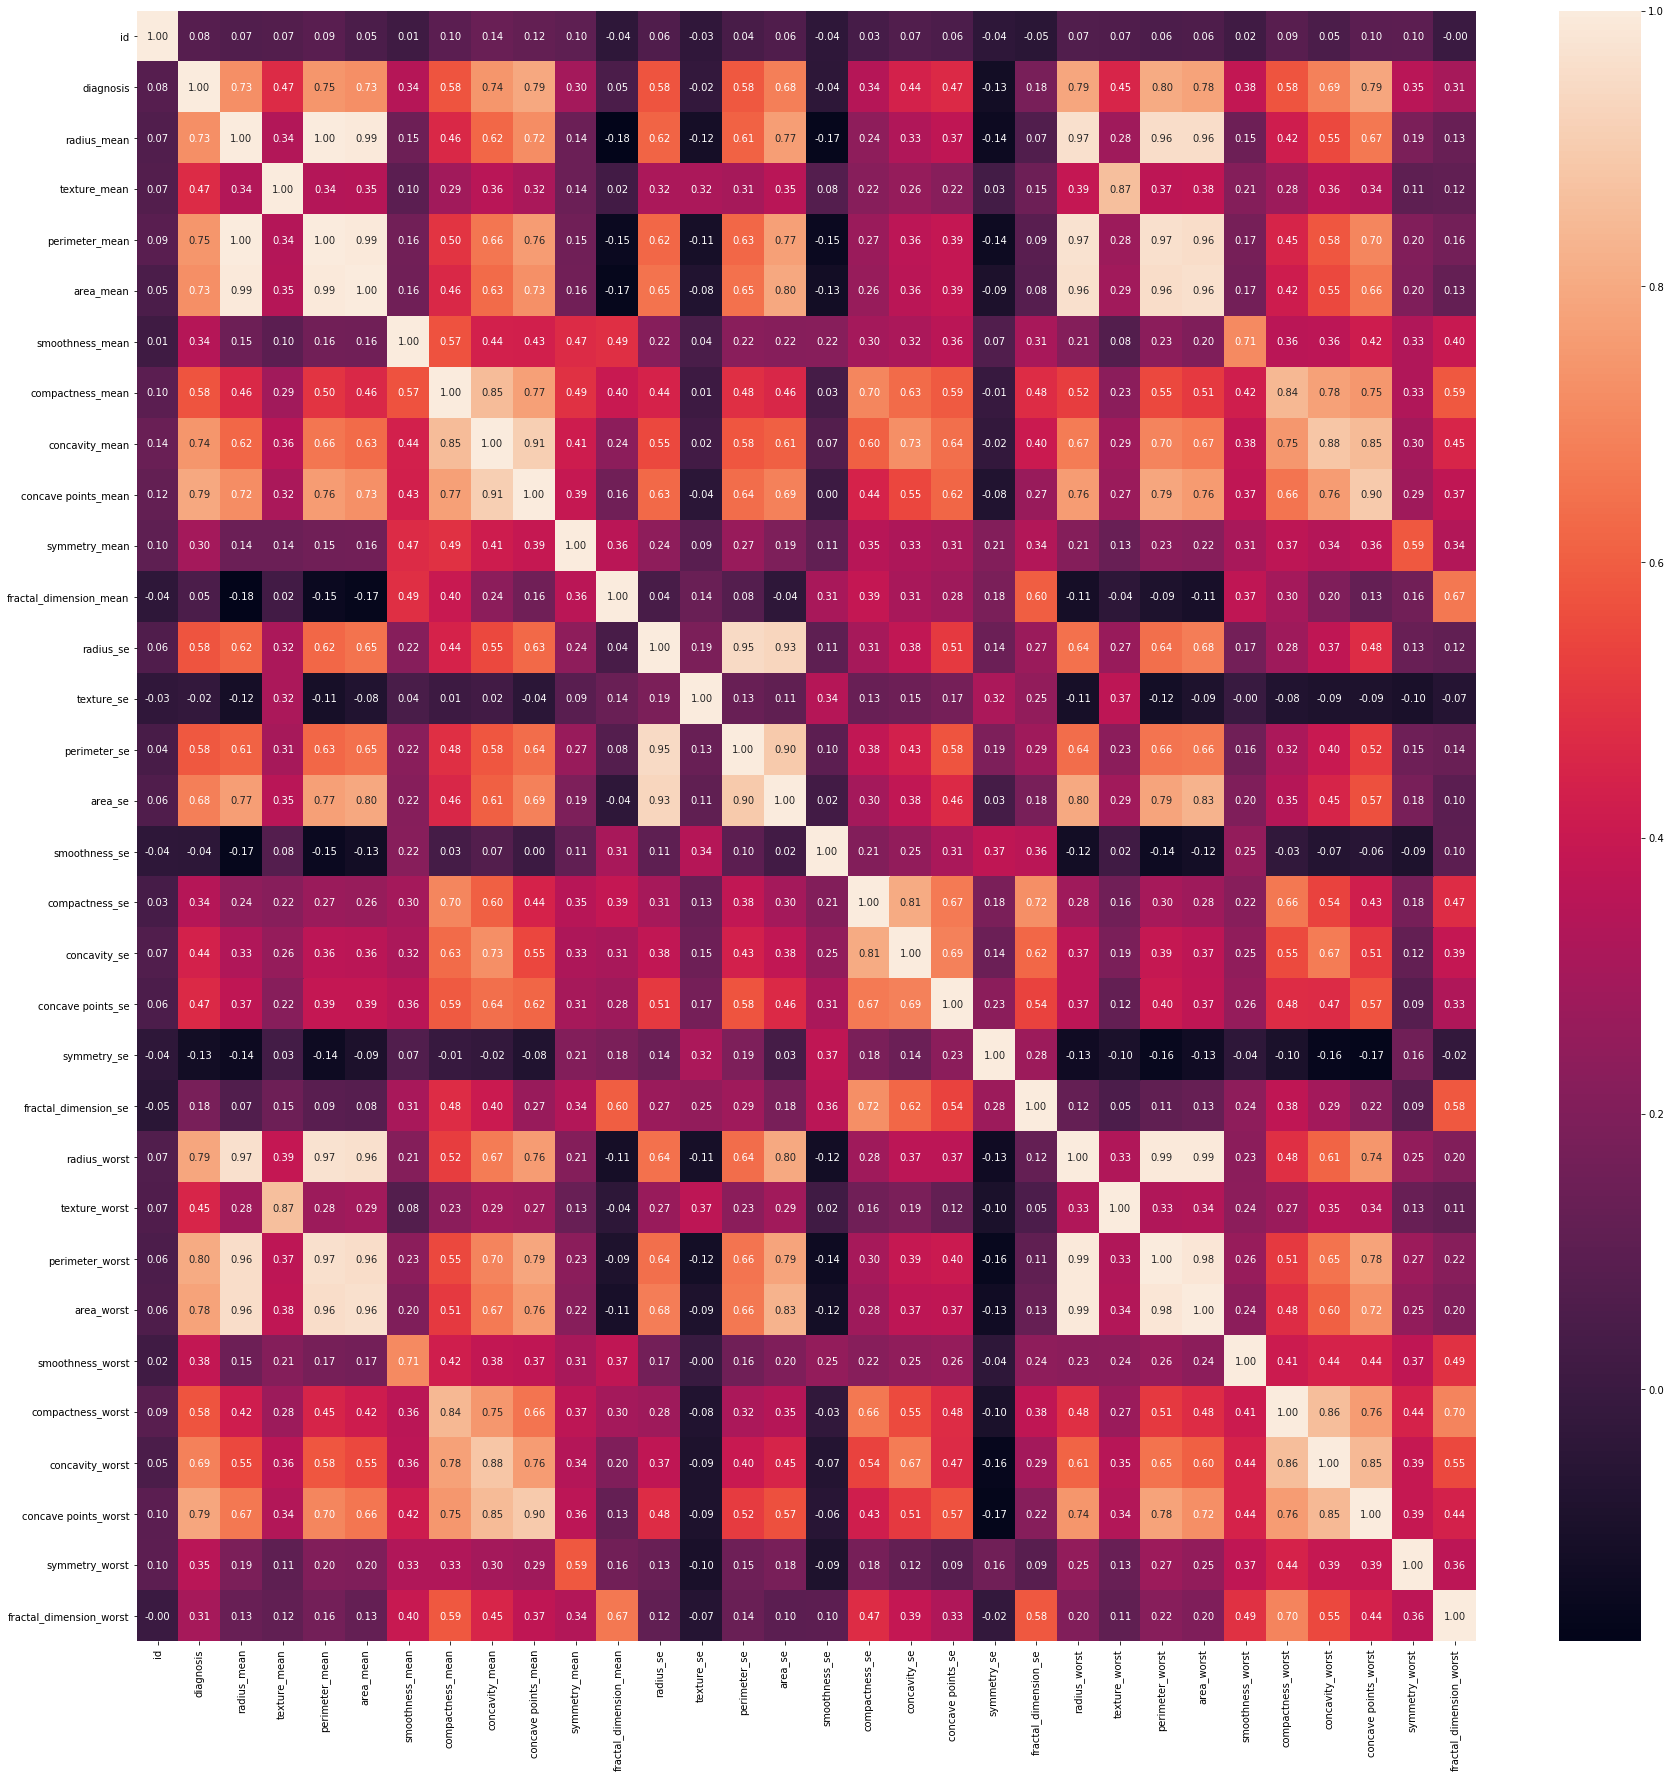

In [102]:
# plot heat map for for all variables
plt.figure(figsize=(30, 30))
sns.heatmap(breastcancerData.corr(), annot=True, fmt='.2f')

#### d) Hypothesis Testing

Ho: r=0

Null Hypothesis Ho: There is no correlation between "radius_worst" and "concave points_worst".

Ha: r=\0

Alternate Hypothesis Ha: There is a correlation between "radius_worst" and "concave points_worst".

In [78]:
# find p-value (Case 1)

var1 = breastcancerData['concave points_worst']
var2 = breastcancerData['radius_worst']

r, p = stat.pearsonr(var1, var2)
print('Correlation Coefficient r = %g, p-value = %g' % (r, p))

Correlation Coefficient r = 0.787424, p-value = 3.05606e-121


In [79]:
# find p-value (Case 2)

var1 = breastcancerData['compactness_worst']
var2 = breastcancerData['smoothness_se']

r, p = stat.pearsonr(var1, var2)
print('Correlation Coefficient r = %g, p-value = %g' % (r, p))

Correlation Coefficient r = -0.0555581, p-value = 0.18571


In Case 1, p-value=0 and << 0.025, we reject Ho. Ha is statistically true: the coefficient is significantly different from Zero. So there is a statistically significant correlation between "concave points_worst" and "radius_worst". 

In case 2, p-value=0.186 > 0.025. We reluctantly accept Ho. There is no statistically significant correlaction between "compactness_worst" and "smoothness_se".

# 2.3 Inferential Statistics


### T-test
T-test independence is for two groups that are independent of each other. We will choose M and B groups.

We do not have data to do paired t-test. Since we don't have different time measurements of the same group.

Ho: uM = uB

Null Hypothesis H0: The mean of "radius_worst" of malignant is the same as the mean of benign. There is no difference between the two groups.

Ha: uM=\uB

Alternate Hypothesis Ha: The mean of "radius_worst" of malignant is not the same as the mean of benign. There is a significant difference between the two groups.

In [80]:
# t-test independence

# separate M and B groups
Mdata = breastcancerData[breastcancerData['diagnosis'] == 'M']
Bdata = breastcancerData[breastcancerData['diagnosis'] == 'B']

# access one of the variable from each class
malignant = Mdata['radius_worst']
benign = Bdata['radius_worst']

t, p = ttest_ind(malignant, benign, equal_var=False)
print('t = %g, p-value = %g' % (t, p))

t = 24.8297, p-value = 3.55656e-71


Since p=0 << 2.5%, we reject Ho, so Ha is true. There is statistically significant difference between the malignant group and benign group in one of their variables "radius_worst". This is the basis of our study, that we can differentiate malignant cells from benign cells to tell if a patient is likely to have cancer. 


# 2.4 Data Science Algorithms

## 2.4.1 Classification Algorithms

The target feature is diagnosis, which is either M (malignant) or B (benign). There are 569 samples and 30 predictor features. The following classification algorithms will be implemented:
1. Logistic Regression
2. Naive Bayes'
3. k-Nearest-Neighbors
4. Random Forest
5. Super Learners
6. Support Vector Machine


## 2.4.2 Data Science Life Cycle
### a) Data Preparation

#### Remove Null Values

In [81]:
# check null
print(breastcancerData.isnull().values.any())
#print(breastcancerData.isnull())
print(breastcancerData.shape)

# Remove null
# The entire last column of breastcancerData is NaN
# So delect the last column instead of dropna() which would delect all rows.
breastcancerData = breastcancerData.iloc[0:569, 0:32]
print(breastcancerData.shape)
print(breastcancerData.isnull().values.any())

True
(569, 33)
(569, 32)
False


#### Remove outliers
If I drop all the NaN, I only left with 186 rows of samples. Not very much. So we'll do fill Nan. 

In [82]:
# replace M and B with numbers
breastcancerData['diagnosis'] = breastcancerData['diagnosis'].replace('M', 1)
breastcancerData['diagnosis'] = breastcancerData['diagnosis'].replace('B', 0)
breastcancerData['diagnosis'].value_counts()

# remove outlier from each feature
for i in range (0, 32):
    a = breastcancerData.iloc[:, i]
    a = pd.Series(a)
    breastcancerData.iloc[:, i] = a[a.between(a.quantile(0.05), a.quantile(0.95))]

print(breastcancerData.shape)
print(breastcancerData.isnull().values.any())

(569, 32)
True


#### Fill outliers with mean of its class

False
False
Dimension of samples Class 0 has: (357, 32)
Dimension of samples Class 1 has: (212, 32)


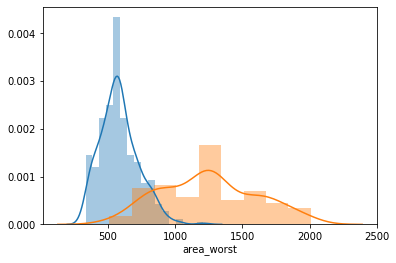

In [83]:
# fill Nan with mean according to its class

# separate into two classes
df_class0 = breastcancerData[breastcancerData['diagnosis'] == 0]
df_class1 = breastcancerData[breastcancerData['diagnosis'] == 1]

#mean of each class
class0_mean = np.mean(df_class0)
class1_mean = np.mean(df_class1)

# fill NaN with mean of its class
df_class0 = df_class0.fillna(class0_mean)
df_class1 = df_class1.fillna(class1_mean)

# check Nan after filling
print(df_class0.isnull().values.any())
print(df_class1.isnull().values.any())

# check distribution after fill Nan
sns.distplot(df_class0['area_worst'])
sns.distplot(df_class1['area_worst'])

# original data is imbalance
print('Dimension of samples Class 0 has:', df_class0.shape)
print('Dimension of samples Class 1 has:', df_class1.shape)

#Combine two classes, join row-wise
joinData = pd.concat([df_class0, df_class1], axis=0)

#### Separate predictor features and target feature

In [84]:
# Separate predictor features X and target feature Y
# iloc is implicit indexing

featuresX = joinData.iloc[:, 2:32]
Y = joinData.iloc[:, 1] #diagnosis
print(featuresX.shape)
print(Y.shape)

(569, 30)
(569,)


### b) Balance and resample data, Standardize data

0.8.0
1    357
0    357
Name: diagnosis, dtype: int64


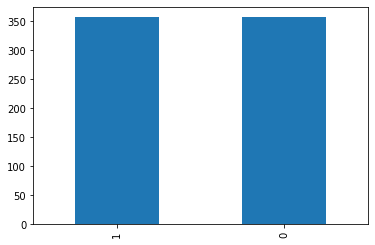

In [85]:
# Balanding B/M data with SMOTE

import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

# transform the data
oversample = SMOTE()
featuresX, Y = oversample.fit_resample(featuresX,Y)

# join Y and X column-wise
join_balancedData = pd.concat([Y, featuresX], axis=1)

# check samples in each class after balance
dist_balance = join_balancedData['diagnosis'].value_counts()
print(dist_balance)
dist_balance.plot(kind='bar')

#### Separate predictor features and target feature again

In [86]:
# Separate predictor features X and target feature Y
balancedX = join_balancedData.iloc[:, 1:31]
Y = join_balancedData.iloc[:, 0] #diagnosis
print(balancedX.shape)
#print(balancedX.head())
print(Y.shape)
#print(Y.head())

(714, 30)
(714,)


#### Data Standardization

mean is: -7.629543848030954e-17
standard deviation is: 1.0


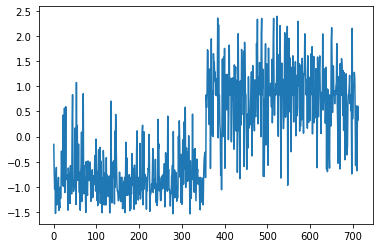

In [87]:
# Standardized data
scaler = StandardScaler()
scaler.fit(balancedX)
X = scaler.transform(balancedX)

# mean is 0
print('mean is:', np.mean(X)) 
# standard deviation is 1
print('standard deviation is:', np.std(X))  

# StandardScaler sometimes stripe away the column name. 
# Retain column name by copying original name
X = pd.DataFrame(X, columns = balancedX.columns)

plt.plot(X['concave points_mean'])

### c) Feature selection

[0.01944774 0.01542806 0.01708505 0.04308417 0.00611528 0.01990872
 0.04872217 0.10546612 0.00335996 0.00313168 0.01212635 0.00525579
 0.01076209 0.04151682 0.00381411 0.00558328 0.00440194 0.00431137
 0.00296218 0.00363055 0.12050904 0.02166313 0.13131024 0.08660467
 0.00898693 0.01748147 0.05614687 0.17235743 0.0046836  0.00414318]
[18  9  8 19 14 29 17 16 28 11 15  4 24 12 10  1  2 25  0  5 21 13  3  6
 26 23  7 20 22 27]


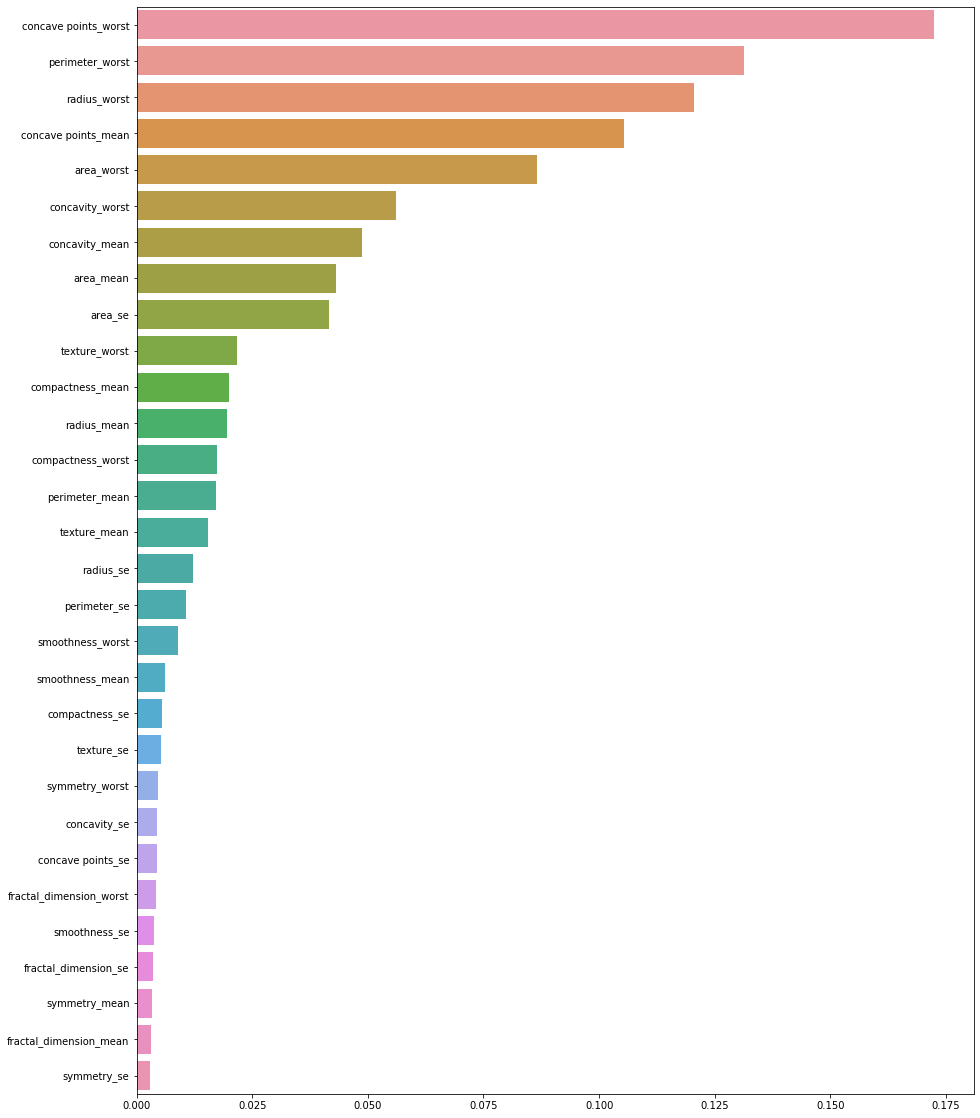

In [88]:
# feature importances using the Random Forest algorithm

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# feature selection of Random Forest algorithm
rf = RandomForestClassifier(n_estimators=100, random_state=12)
rf.fit(X_train, y_train)
rf.feature_importances_
print(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()
print(sorted_idx)

# sort feature scores
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Visualization
f, ax = plt.subplots(figsize=(15, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
plt.show()

### d) Divide Test and Train sets, Cross-validation to avoid overfitting

In [89]:
# split test and training sets of data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0, shuffle=True)

# set k-fold to 10
kf = KFold(n_splits=10, shuffle=True, random_state=123)

# classifier to test
rfc = RandomForestClassifier(n_estimators=100, random_state=12)

# performace cross-validation testing
cv_scores_30 = cross_val_score(rfc, X_train, y_train, cv=kf)
print(cv_scores_30)
print("mean of 10-fold cross-validation with 30 features %.4f" % np.mean(cv_scores_30))


[0.92592593 1.         1.         1.         0.94444444 0.96226415
 0.90566038 0.98113208 0.94339623 0.90566038]
mean of 10-fold cross-validation with 30 features 0.9568


### e) Evaluate first algorithm -- Random Forest

[[92  1]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        93
           1       0.99      1.00      0.99        86

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179

RF Accuracy on training data with original 30 features is 1.0000
RF Accuracy on test data with original 30 features is 0.9944
AUROC on test data with original 30 features is 0.9946
accuracy on test data with original 30 features is 0.9944


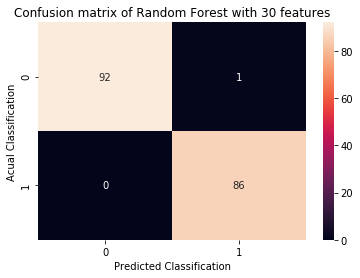

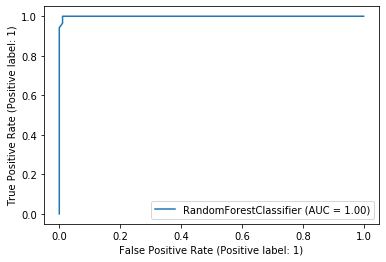

In [90]:
# Random Forest Implementation

# Train Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=12)
forest.fit(X_train, y_train)

# Predict with trained model
y_pred = forest.predict(X_test)

# print and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of Random Forest with 30 features')

#print F1 score
print(classification_report(y_test, y_pred))

# check accuracy
accuracy_train = forest.score(X_train, y_train)
accuracy_test = forest.score(X_test, y_test)
AUROC = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('RF Accuracy on training data with original 30 features is %.4f' % accuracy_train)
print('RF Accuracy on test data with original 30 features is %.4f'% accuracy_test)
print('AUROC on test data with original 30 features is %.4f' % AUROC)
print('accuracy on test data with original 30 features is %.4f' % accuracy)

#plot AUROC curve
metrics.plot_roc_curve(forest, X_test, y_test)

### Random Forest with feature selection

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        93
           1       0.96      1.00      0.98        86

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Random Forest accuracy on training data is 0.9925
Random Forest accuracy on test data is 0.9777


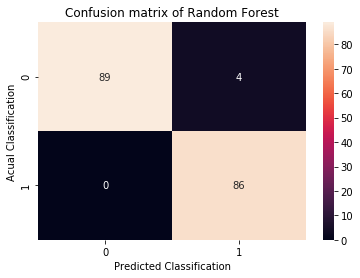

In [91]:
# Random Forest with 5 features

imp_features_X = pd.concat([X['concave points_worst'], X['perimeter_worst'], X['concave points_mean'], X['area_worst'], X['radius_worst']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(imp_features_X, Y, test_size=0.25, random_state=0)

# Train Classifier
rfc = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt', n_estimators=50)
rfc.fit(X_train, y_train)

# Predict with trained model
y_pred = rfc.predict(X_test)

# result summary
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of Random Forest')

#print F1 score
print(classification_report(y_test, y_pred))

accuracy_train = rfc.score(X_train, y_train)
accuracy_test = rfc.score(X_test, y_test)
print('Random Forest accuracy on training data is %.4f' % accuracy_train)
print('Random Forest accuracy on test data is %.4f'% accuracy_test)

Random Forest with the 5 most important feature does not improve performance compared to 30 features. This is probably because each of the 30 features contributes in predicting the target feature in some way. 

### f) Evaluate Variety of Algorithms, Test Harness and Cross-validation Bootstrapping for Improvement

### Support Vector Machine

In [92]:
# SVM
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1, 0.1, 0.01] # regularization, inverse this
gamma = ['scale', 'auto'] # coefficient for kernel

# define grid search
grid = dict(kernel=kernel, C=C, gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.940764 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.926369 (0.031139) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.932669 (0.023607) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.918891 (0.033464) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.926369 (0.031139) with: {'C': 50, 'gamma': 'auto', 'kernel': 'poly'}
0.932041 (0.024062) with: {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}
0.919532 (0.033736) with: {'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.910738 (0.035446) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.930806 (0.027046) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.925798 (0.032658) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.910738 (0.035446) with: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
0.930806 (0.027046) with: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.925169 (0.033216) with: {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.910738 (0.037996) with: {'C': 1, 'gamma': 'scale', 'kernel': 'pol

### Logistic Regression algorithm

In [93]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# define model and parameters
model = LogisticRegression(random_state=345)
penalty = ['l1', 'l2']
C = [100, 10, 1, 0.1, 0.01]
max_iter = [100, 500, 1000]

# define grid search
grid = dict(penalty=penalty, C=C, max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.941358 using {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 100, 'penalty': 'l1'}
0.940752 (0.030326) with: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 500, 'penalty': 'l1'}
0.940752 (0.030326) with: {'C': 100, 'max_iter': 500, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}
0.940752 (0.030326) with: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
0.941358 (0.026944) with: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 10, 'max_iter': 500, 'penalty': 'l1'}
0.941358 (0.026944) with: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
0.941358 (0.026944) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 1, 'max_iter': 100, 'penalty': 'l1'}
0.940741 (0.0266

### K-Nearest Neighbors algorithm

In [94]:
# KNN

# define model and parameters
model = KNeighborsClassifier()
n_neighbors = range(3,30)
weights = ['uniform', 'distance'] 

# define grid search
grid = dict(n_neighbors=n_neighbors, weights=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948288 using {'n_neighbors': 10, 'weights': 'distance'}
0.948253 (0.022641) with: {'n_neighbors': 3, 'weights': 'uniform'}
0.947647 (0.024449) with: {'n_neighbors': 3, 'weights': 'distance'}
0.938307 (0.028697) with: {'n_neighbors': 4, 'weights': 'uniform'}
0.945167 (0.020988) with: {'n_neighbors': 4, 'weights': 'distance'}
0.937002 (0.029719) with: {'n_neighbors': 5, 'weights': 'uniform'}
0.941999 (0.026715) with: {'n_neighbors': 5, 'weights': 'distance'}
0.938248 (0.030017) with: {'n_neighbors': 6, 'weights': 'uniform'}
0.945761 (0.026181) with: {'n_neighbors': 6, 'weights': 'distance'}
0.937643 (0.026254) with: {'n_neighbors': 7, 'weights': 'uniform'}
0.943897 (0.023183) with: {'n_neighbors': 7, 'weights': 'distance'}
0.936420 (0.027646) with: {'n_neighbors': 8, 'weights': 'uniform'}
0.945784 (0.024317) with: {'n_neighbors': 8, 'weights': 'distance'}
0.942651 (0.024161) with: {'n_neighbors': 9, 'weights': 'uniform'}
0.948265 (0.023535) with: {'n_neighbors': 9, 'weights': 'di

### Random Forest algorithm

In [95]:
# Random Forest

# define model and parameters
model = RandomForestClassifier(random_state=12)
n_estimators = [50, 75, 100, 125]
criterion = ['gini', 'entropy']
max_depth = range(1,10)
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948311 using {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}
0.925204 (0.034099) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 50}
0.927673 (0.030522) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 75}
0.926450 (0.032336) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
0.927056 (0.030306) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 125}
0.925204 (0.034099) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 50}
0.927673 (0.030522) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 75}
0.926450 (0.032336) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 100}
0.927056 (0.030306) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 125}
0.940123 (0.022956) with: 

### Naive Bayes' algorithm

In [96]:
# Naive Bayes

# define model and parameters
model = GaussianNB()
var_smoothing = [1e-20, 1e-10, 1e-5]

# define grid search
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934498 using {'var_smoothing': 1e-20}
0.934498 (0.028224) with: {'var_smoothing': 1e-20}
0.934498 (0.028224) with: {'var_smoothing': 1e-10}
0.934498 (0.028224) with: {'var_smoothing': 1e-05}


## g) Improve results with hyperparameters and ensembles

### SVM with hyperparameters

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.98      0.99      0.98        86

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

SVM accuracy on training data is 0.9364
SVM accuracy on test data is 0.9832


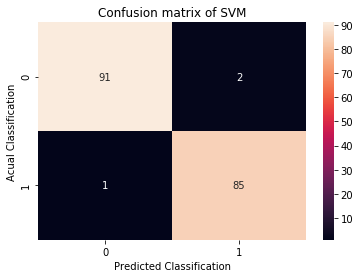

In [97]:
# SVM

# Train Classifier
svc = SVC(C=10, gamma='scale', kernel='rbf')
svc.fit(X_train, y_train)

# Predict with trained model
y_pred = svc.predict(X_test)

# result summary
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of SVM')

#print F1 score
print(classification_report(y_test, y_pred))

accuracy_train = svc.score(X_train, y_train)
accuracy_test = svc.score(X_test, y_test)
print('SVM accuracy on training data is %.4f' % accuracy_train)
print('SVM accuracy on test data is %.4f'% accuracy_test)


### Super Learners algorithm

Train (500, 100) (500,) Test (500, 100) (500,)
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.90     0.06  0.84  0.03  0.04  0.01
layer-1  baggingclassifier            0.85     0.05  0.38  0.02  0.02  0.02
layer-1  decisiontreeclassifier       0.69     0.07  0.06  0.01  0.00  0.00
layer-1  extratreesclassifier         0.81     0.05  0.14  0.03  0.01  0.01
layer-1  gaussiannb                   0.98     0.02  0.01  0.00  0.00  0.00
layer-1  kneighborsclassifier         0.92     0.03  0.00  0.00  0.04  0.01
layer-1  logisticregression           0.95     0.02  0.03  0.01  0.00  0.00
layer-1  randomforestclassifier       0.84     0.04  0.14  0.02  0.01  0.01
layer-1  svc                          0.97     0.02  0.14  0.02  0.00  0.00

Super Learner: 96.800


Text(0.5, 1, 'Confusion matrix of Super Learners')

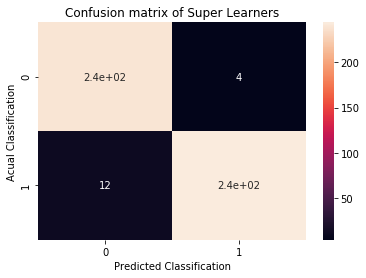

In [98]:
# Super Learners

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlens.ensemble import SuperLearner

# redefine X, so it does not affect the other code, because X gets changed by super Learner
X_sl = X

# create a list of base-models
def get_models():
    models = list()
    models.append(LogisticRegression(solver='liblinear'))
    models.append(DecisionTreeClassifier())
    models.append(SVC(gamma='scale', probability=True))
    models.append(GaussianNB())
    models.append(KNeighborsClassifier())
    models.append(AdaBoostClassifier())
    models.append(BaggingClassifier(n_estimators=10))
    models.append(RandomForestClassifier(n_estimators=10))
    models.append(ExtraTreesClassifier(n_estimators=10))
    return models

# create the super learner
def get_super_learner(X_sl):
    ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X_sl))
    # add base models
    models = get_models()
    ensemble.add(models)
    # add the meta model
    ensemble.add_meta(LogisticRegression(solver='lbfgs'))
    return ensemble


 # create the inputs and outputs
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X_sl, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# split
X_sl, X_val, y, y_val = train_test_split(X_sl, y, test_size=0.50)
print('Train', X_sl.shape, y.shape, 'Test', X_val.shape, y_val.shape)

# create the super learner
ensemble = get_super_learner(X_sl)
# fit the super learner
ensemble.fit(X_sl, y)
# summarize base learners
print(ensemble.data)
# make predictions on hold out set
yhat = ensemble.predict(X_val)
print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

# result summary
cm = confusion_matrix(y_val, yhat)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of Super Learners')



### Logistic Regression with hyperparameters

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.98      0.99      0.98        86

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Logistic Regression accuracy on training data is 0.9421
Logistic Regression accuracy on test data is 0.9832


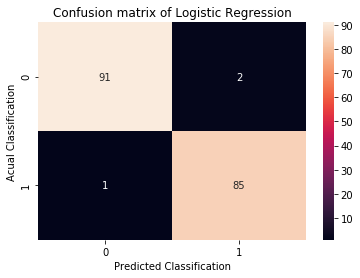

In [99]:
# Logistic Regression with hyperparameters

# Train Classifier
lr = LogisticRegression(C=1, max_iter=100, penalty='l2')
lr.fit(X_train, y_train)

# Predict with trained model
y_pred = lr.predict(X_test)

# result summary
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of Logistic Regression')

#print F1 score
print(classification_report(y_test, y_pred))

accuracy_train = lr.score(X_train, y_train)
accuracy_test = lr.score(X_test, y_test)
print('Logistic Regression accuracy on training data is %.4f' % accuracy_train)
print('Logistic Regression accuracy on test data is %.4f'% accuracy_test)


### k-Nearest Neighbor with hyperparameters

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.97      0.98      0.97        86

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179

kNN accuracy on training data is 0.9607
kNN accuracy on test data is 0.9721


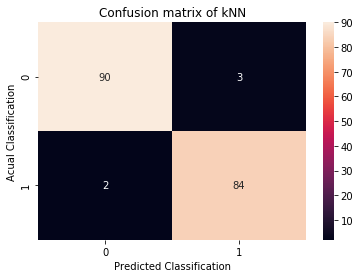

In [100]:
# KNN with hyperparameters

# Train Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict with trained model
y_pred = knn.predict(X_test)

# result summary
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of kNN')

#print F1 score
print(classification_report(y_test, y_pred))

accuracy_train = knn.score(X_train, y_train)
accuracy_test = knn.score(X_test, y_test)
print('kNN accuracy on training data is %.4f' % accuracy_train)
print('kNN accuracy on test data is %.4f'% accuracy_test)


### Naive Bayes'

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        93
           1       0.98      1.00      0.99        86

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179

Naive Bayes accuracy on training data is 0.9346
Naive Bayes accuracy on test data is 0.9888


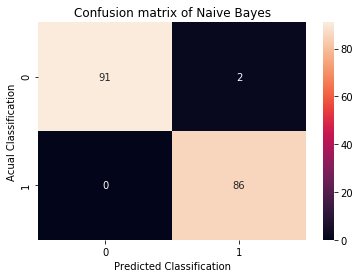

In [101]:
# Naive Bayes'

# Train Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict with trained model
y_pred = gnb.predict(X_test)

# result summary
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Classification')
plt.ylabel('Acual Classification')
plt.title('Confusion matrix of Naive Bayes')

#print F1 score
print(classification_report(y_test, y_pred))

accuracy_train = gnb.score(X_train, y_train)
accuracy_test = gnb.score(X_test, y_test)
print('Naive Bayes accuracy on training data is %.4f' % accuracy_train)
print('Naive Bayes accuracy on test data is %.4f'% accuracy_test)

### Summary of results

| Model | Accuracy |
| --- | --- |
| Random Forest (with all features) | 99% | 
| --- | --- |
| Random Forest (with 5 most important features) | 98% | 
| --- | --- | 
| Naive Bayes | 99% | 
| --- | --- | 
| Logistic Regression | 98% | 
| --- | --- |
| SVM | 98% | 
| --- | --- | 
| Super Learners | 97% |  
| --- | --- |  
| kNN | 97% | 

### h) Summary
Among the 6 algorithms tested above, Random Forest gives the best accuracy of 99% (178 correct out of 179 test samples). By balancing and resampling data, and by replacing outliers with means of their classes, it improves accuracy significantly. This Kaggle Breast Cancer Wisconsin Dataset is a nice and clean dataset, that helps model giving an excellent performance. 

I was surprised that SVM and Super Learners do not exceed Random Forest.   

I am new in the field of Data Science, but I am excited to see how Data Science can be applied to analyze cells from many patients. 

One weakness of this dataset is that it only has benign and malignant diagnosis. It would be interesting to include pre-cancer cells. Precancer cells are abnormal cells but do not invade or spread. 

More than 1500 codes have been submitted in Kaggle and paper is published with study on this dataset [2]. This dataset is well studied and that is great. For future work, it would be interesting to apply data science algorithms on many breast cancer patients to test its accuracy. 

# References:


1. Differences Between a Malignant and Benign Tumor.   https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240

2. Analysis of Breast Cancer Detection Using Different Machine Learning Techniques (International Conference on Data Mining and Big Data 2020)


What do doctors look for in biopsy and cytology speciments?   https://www.cancer.org/treatment/understanding-your-diagnosis/tests/testing-biopsy-and-cytology-specimens-for-cancer/what-doctors-look-for.html
